In [36]:
import pandas as pd
from datetime import datetime
import re
import matplotlib.pyplot as plt
% matplotlib inline

## User Interations

Explores the dataset file containing users interactions on shared articles (users_interactions.csv).

In [61]:

interactions_df = pd.read_csv("data/users_interactions.csv")
interactions_df.head(10)

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN
5,1465413742,VIEW,310515487419366995,-8763398617720485024,1395789369402380392,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,MG,BR
6,1465415950,VIEW,-8864073373672512525,3609194402293569455,1143207167886864524,NaN,NaN,NaN
7,1465415066,VIEW,-1492913151930215984,4254153380739593270,8743229464706506141,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR
8,1465413762,VIEW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
9,1465413771,VIEW,3064370296170038610,3609194402293569455,1143207167886864524,NaN,NaN,NaN


In [20]:
def to_datetime(ts):
    return datetime.fromtimestamp(ts)
    
def to_datetime_str(ts):
    return to_datetime(ts).strftime("%Y-%m-%d %H:%M:%S")

print('First interations: \t%s' %to_datetime_str(interactions_df['timestamp'].min()))
print('First interations: \t%s' %to_datetime_str(interactions_df['timestamp'].max()))


First interations: 	2016-03-14 19:24:36
First interations: 	2017-03-01 00:51:51


In [28]:
total_count = len(interactions_df)
android_count = len(interactions_df[interactions_df['userAgent'] == 'Android - Native Mobile App'])
ios_count = len(interactions_df[interactions_df['userAgent'] == 'iOS - Native Mobile App'])

print('# of interactions (total): \t%d' % total_count)
print('# of interactions (Android native app): \t%d' % android_count)
print('# of interactions (iOS native app): \t%d' % ios_count)

# of interactions (total): 	72312
# of interactions (Android native app): 	6761
# of interactions (iOS native app): 	103


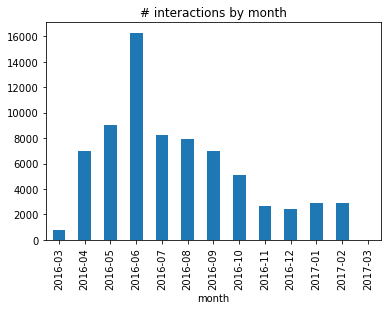

In [42]:
interactions_df['datetime'] = interactions_df['timestamp'].apply(lambda x: to_datetime(x))
interactions_df['month'] = interactions_df['datetime'].apply(lambda x: '{0}-{1:02}'.format(x.year, x.month))
interactions_df.groupby('month').size().plot(kind='bar', title="# interactions by month")
plt.show()

In [43]:
interactions_df.groupby('eventType').size().sort_values(ascending=True)

eventType
FOLLOW              1407
COMMENT CREATED     1611
BOOKMARK            2463
LIKE                5745
VIEW               61086
dtype: int64

In [46]:
print("Distinct article : \t%d" % len(interactions_df['contentId'].unique()))
print('Distinct users: \t%d' % len(interactions_df['personId'].unique()))
print('Distinct user sessions: \t%d' % len(interactions_df['sessionId'].unique()))

Distinct article : 	2987
Distinct users: 	1895
Distinct user sessions: 	28740


In [69]:
interactions_df.groupby('personId')['contentId'].size().describe()

count    1895.000000
mean       38.159367
std       104.143355
min         1.000000
25%         3.000000
50%        10.000000
75%        32.000000
max      1885.000000
Name: contentId, dtype: float64

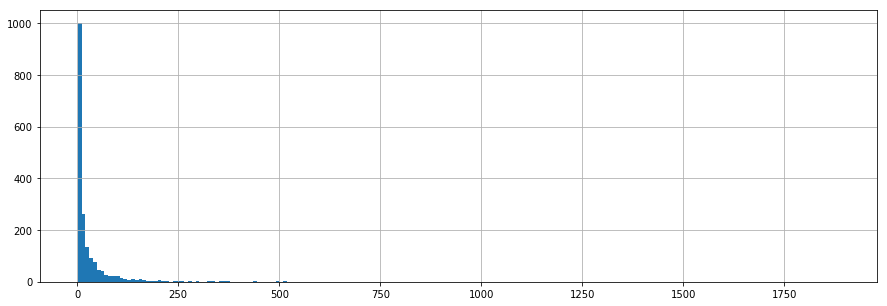

In [73]:
interactions_df.groupby('personId')['contentId'].size().hist(bins=200, figsize=(15,5))

In [80]:
country_code_dict = {
    'BR': ('BRA', 'Brazil'),
    'US': ('USA', 'United States'),
    'KR': ('KOR', 'South Korea'),
    'CA': ('CAN', 'Canada'),
    'JP': ('JPN', 'Japan'),
    'AU': ('AUS', 'Australia'),
    'GB': ('GBR', 'United Kingdom'),
    'DE': ('DEU', 'Germany'),
    'DE': ('DEU', 'Germany'),
    'IE': ('IRL', 'Ireland'),
    'IS': ('ISL', 'Iceland'),
    'SG': ('SGP', 'Singapure'),
    'AR': ('ARG', 'Argentina'),
    'PT': ('PRT', 'Portugal'),
    'IN': ('IND', 'India'),
    'ES': ('ESP', 'Spain'),
    'IT': ('ITA', 'Italy'),
    'MY': ('MYS', 'Malaysia'),
    'CO': ('COL', 'Colombia'),
    'CN': ('CHN', 'China'),
    'CL': ('CHL', 'Chile'),
    'NL': ('NLD', 'Netherlands')
}

interactions_df['countryName'] = interactions_df['userCountry'].apply(lambda x: country_code_dict[x][1] if x in 
                                                                     country_code_dict else None)

interactions_df[['userCountry', 'countryName']].head(10)

,userCountry,countryName
0,NaN,None
1,US,United States
2,NaN,None
3,NaN,None
4,NaN,None
5,BR,Brazil
6,NaN,None
7,BR,Brazil
8,NaN,None
9,NaN,None


In [88]:
interactions_by_country_df = pd.DataFrame(interactions_df.groupby('countryName'
                                                                 ).size().sort_values(ascending=False).reset_index())
interactions_by_country_df.columns = ['country', 'count']
interactions_by_country_df

,country,count
0,Brazil,51396
1,United States,4657
2,South Korea,239
3,Canada,226
4,Japan,144
5,Australia,138
6,United Kingdom,22
7,Germany,19
8,Ireland,14
9,Iceland,13


In [94]:
import plotly.offline as py
py.offline.init_notebook_mode()

data = [ dict(
        type = 'choropleth',
        locations = interactions_by_country_df['country'],
        z = interactions_by_country_df['count'],
        locationmode = 'country names',
        text = interactions_by_country_df['country'],
        colorscale = [[0,"rgb(153, 241, 243)"],[0.005,"rgb(16, 64, 143)"],[1,"rgb(0, 0, 0)"]],
        autocolorscale = False,
        marker = dict(
            line = dict(color = 'rgb(58,100,69)', width = 0.6)),
            colorbar = dict(autotick = True, tickprefix = '', title = '# of Interactions')
            )
       ]

layout = dict(
    title = 'Total number of interactions by country',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
        type = 'equirectangular'
        ),
    margin = dict(b = 0, t = 0, l = 0, r = 0)
            )
    )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [95]:
interactions_df['userCountryRegion'] = interactions_df['userCountry'] + '-' + interactions_df['userRegion']
interactions_df.groupby('userCountryRegion').size().sort_values(ascending=False).head(10)

userCountryRegion
BR-SP    40164
BR-MG    10229
US-NY     1257
US-TX      923
US-GA      910
BR-RJ      775
US-NJ      698
US-CA      238
CA-ON      202
KR-?       165
dtype: int64

## Shared Articles

In [96]:
articles_df = pd.read_csv('data/shared_articles.csv')
articles_df.head(5)

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [97]:
print('First article sharing: \t%s' % to_datetime(articles_df['timestamp'].min()))
print('Last article sharing: \t%s' % to_datetime(articles_df['timestamp'].max()))

First article sharing: 	2016-03-29 00:49:39
Last article sharing: 	2017-03-01 00:21:11


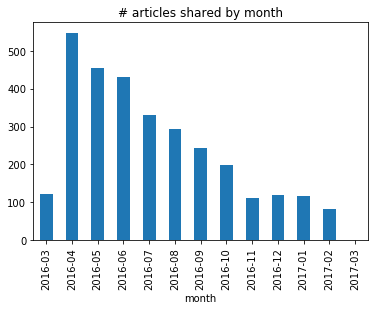

In [98]:
articles_df['datetime'] = articles_df['timestamp'].apply(lambda x: to_datetime(x))
articles_df['month'] = articles_df['datetime'].apply(lambda x: '{0}-{1:02}'.format(x.year, x.month))
articles_df[articles_df['eventType'] == 'CONTENT SHARED'].groupby('month').size() \
        .plot(kind='bar', title='# articles shared by month')

In [99]:
articles_df.groupby('eventType').size().sort_values(ascending=False)

eventType
CONTENT SHARED     3047
CONTENT REMOVED      75
dtype: int64

In [100]:
print('Distinct articles: \t%d' % len(articles_df['contentId'].unique()))
print('Distinct sharers (users): \t%d' % len(articles_df['authorPersonId'].unique()))

Distinct articles: 	3057
Distinct sharers (users): 	252


In [101]:
articles_df.groupby('contentType').size().sort_values(ascending=False)

contentType
HTML     3101
VIDEO      11
RICH       10
dtype: int64

In [102]:
articles_df.groupby('lang').size().sort_values(ascending=False)

lang
en    2264
pt     850
la       4
ja       2
es       2
dtype: int64

In [103]:
articles_df['urlDomain'] = articles_df['url'].apply(lambda x: re.sub(r'^http[s]*:\/\/', '', re.search(r'^http[s]*:\/\/[\w\.]*', x, re.IGNORECASE).group(0)))
articles_df[['urlDomain','url']].head()

,urlDomain,url
0,www.nytimes.com,http://www.nytimes.com/2016/03/28/business/dea...
1,www.nytimes.com,http://www.nytimes.com/2016/03/28/business/dea...
2,cointelegraph.com,http://cointelegraph.com/news/bitcoin-future-w...
3,cloudplatform.googleblog.com,https://cloudplatform.googleblog.com/2016/03/G...
4,bitcoinmagazine.com,https://bitcoinmagazine.com/articles/ibm-wants...


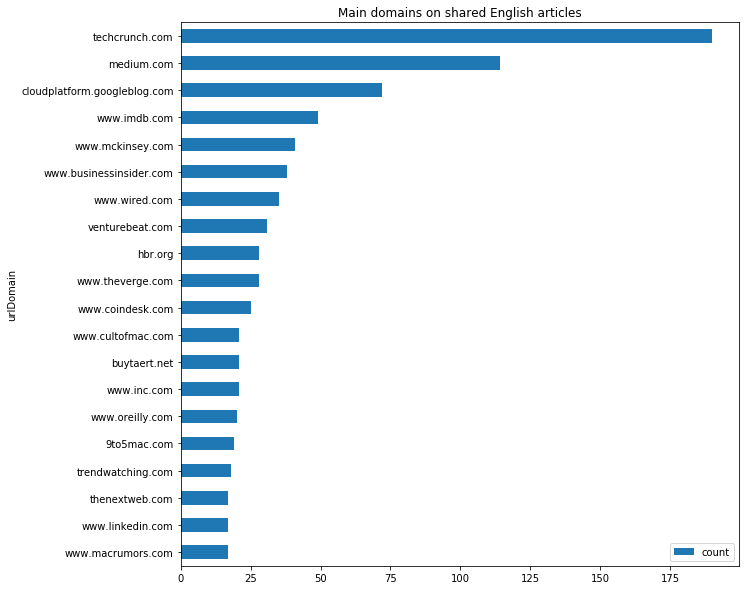

In [104]:
main_domains_df = pd.DataFrame(articles_df[articles_df['lang'] == 'en'].groupby('urlDomain').size().sort_values(ascending=True))[-20:].reset_index()
main_domains_df.columns = ['urlDomain','count']
main_domains_df.plot(kind='barh', x='urlDomain', y='count', figsize=(10,10), title='Main domains on shared English articles')